# LOESS 와 LOESS 에 대해서 설명한다.
강의 이후 기대 효과: 
1. NIPS 에서 GC contents 제거에 많이 쓰이는 방법을 이해 할 수 있다
1. local regression 의 개념을 이용하여 다른 비선형적 데이터에서 회귀분석을 할 수 있다.
1. 그 밖에 주식데이터 등에 적용은 알아서 하면 된다.

## 먼저 필요한 python library 들을 import 한다

In [68]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## 그 다음 랜덤으로 non linear 값을 만든다

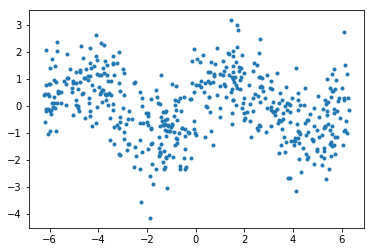

In [31]:
lowess=sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
plt.plot(x,y,'.')

## LOWESS 를 일단 적용해 본다

In [36]:
z = lowess(y, x, return_sorted=True)
w = lowess(y, x, frac=1./3)

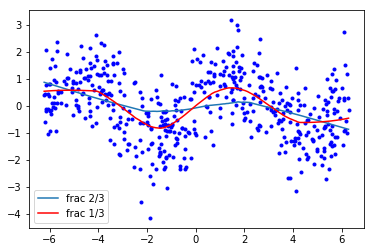

In [37]:
plt.plot(x,y,'.b')
plt.plot(z[:,0],z[:,1], label="frac 2/3")
plt.plot(w[:,0],w[:,1],'r', label="frac 1/3")
plt.legend()

## 우리가 흔히 하는 linear regression 에서는 상상도 할 수 없는 결과이다.
linear regression 은 전체 데이터를 바탕으로 하여 least square error 를 최소화 하려고 하지만 LOWESS 나 LOESS 에서는 몇개의 점들만을 이용해서 이러한 행동을 한다.
회귀에 사용하는 점들의 개수가 적을 수록 변동폭은 커지지만 데이터에 잘 적합하다고 볼 수도 있다.

비교의 의미로 linear regression 을 해보자

In [23]:
from sklearn.linear_model import LinearRegression

linear regression 은 parameter 가 정해져 있다. 
즉 
\begin{equation*}
y=\beta_0+\beta_1\times X
\end{equation*}

이 수식에 따라서 위의 sin 함수 기반 random 데이터에 적합을 해보면 

In [59]:
xp=x.reshape(len(x),1)
yp=y.reshape(len(y),1)
model=LinearRegression().fit(xp,yp)
print("beta1={}, beta0={}".format(model.coef_[0][0],model.intercept_[0]))

beta1=-0.06719654481162513, beta0=-0.05655590944196497


(참고) 
* 인자 (parameter) 만 알면 데이터 없이 통계 분포를 구축해낼 수 있는 것 ==> parametric
* 인자가 없어서 데이터를 가지고 분포를 구축해야 하는 것 ==> nonparametric 
으로 대략적으로 구분이 가능하다.

linear regression 은 $\beta$ 만 알면 직선 회귀식을 구현해 낼 수 있으므로 parametric 이다.

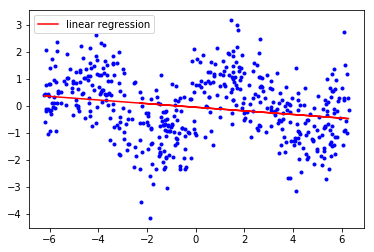

In [62]:
beta0=model.intercept_[0]
beta1=model.coef_[0][0]
predy=beta1*x + beta0
plt.plot(x,y,'.b')
plt.plot(x,predy,'r',label="linear regression")
plt.legend()

## LOWESS 또는 LOESS 의 개념
LOESS 는 일부의 근처 데이터 점들만을 이용해서 least square regression 을 하는 것을 말한다. 이때 가까운 것에서 멀리 가는 것에 대해서 weight 를 주어서 근처의 데이터로부터 영향을 더 많이 받도록 하는 것이다.
하지만 outlier 에 영향을 받기때문에 반복을 주어서 그 영향을 줄인다. (iteration 을 넣도록 되어있다.)

* 참고1: [statQuest 의 설명](https://www.youtube.com/watch?v=Vf7oJ6z2LCc)
* 참고2: [python statsmodel limbrary](https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html)
* Cleveland 의 최초 논문: [연결](http://home.eng.iastate.edu/~shermanp/STAT447/Lectures/Cleveland%20paper.pdf)

위의 개념으로 생각해 보면 근처의 점의 갯수를 조금 쓸 수록 전체 데이터를 잘 따라가게 되지만 변동이 너무 심하게 되고 점을 전체를 사용하면 할 수록 변동은 줄어들지만 전체 데이터를 잘 설명하지 못하게 된다. loess function 에서는 보통 이것을 fraction 비율을 이용해서 조절한다. 

### LOWESS 와 LOESS 의 차이점은?
정확한 차이점은 명확해 보이지 않는다. R 에서의 관점으로는 LOWESS 의 일반화 버전이 LOESS 이다. variate 를 여러개를 지원하는 것이 LOESS 이고 weight function 을 사용하지 않을 수 있는 것도 LOESS 이다. LOESS 는 거기에 Confidence interval 을 줄 수 있는 장점이 있다.

## 다음으로 해야 할 일
모델을 만들었으면 새로운 input $X$ 가 들어왔을 때 regression 식에 따른 $\hat{Y}$ 를 예측해 낼 수 있어야 할 것이다.
하지만 위의 python package 에서 지원하는 lowess 함수는 curve fitting 으로만 끝이 난다. 그렇다면 어떻게 model 을 만들어서 사용할 수 있을까?
이럴 때는 과감하게 R 을 사용할 필요가 있다.
* 참조1: [R document: predict.loess](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/predict.loess)
* 참조2: [R documnt: loess](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/loess)

## NIPS 에서 이 방법의 활용 처
1. 우선 DP~GC plot 을 생각해 보자. GC 에 따른 DP 의 값이 nonlinear 한 것을 관찰 할 수 있다. 현재는 그림으로 그려서 데이터가 이상한지 아닌지를 판단하고 있지만 LOESS curve 를 이용 할 수 있다면 앞으로는 regression line 에서 떨어진 정도로 이상 여부를 판단 할 수 있을 것이다.
1. 현재 저출산 과제에서 Lueven plot 을 쌍태아에 대해서 F-F, F-M, M-M 쌍태아를 plotting 할 때 depth 에 대한 GC bias 처리를 해 주지 않았다. 이 이유 때문에 outlier 가 존재할 가능성이 있다. 이 데이터를 GC bias 보정을 할 때 사용이 가능하다.